# Task 1: Graph Analytics

## Extracting mention Graph

Importing all necessary libraries

In [1]:
import csv
import re
import collections
import operator
#from collections import Counter
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A tweet object which contains the data extracted from the Twitter data

In [2]:
class tweet:
  def __init__(self, t):
    self.timestamp = t[0]
    self.author = t[1]
    self.content = t[2]

Creating the dataset of tweets from the 'twitter.tsv' file. The .tsv file was read using the csv library, which also accepts tab seperated values.

In [3]:
with open("twitter.tsv", encoding="utf8") as fd:
    
    tweets = []
    rd = csv.reader(fd, delimiter="\t", quotechar='"')

    for row in rd:
        tweets.append(tweet(row))

Creating a dictionary of edges. Using a dictionary gives us the ability to set a key pair and a corresponding value. This is useful because we can use the author of the tweet and the user mentioned as the key with the number of times mentioned as the value. This is important because the number of mentions is used as the weights on the edges of the graph.

By using regex, we can extract just the user's alias without the extra @ symbol or any other characters. If a new (author, mentioned)key is found, it is added to the dictionary. If an existing (author, mentioned)key is found, the value is incremented instead. By iterating through only the tweets which contain an '@', it reduces running time and power.

In [4]:
edges = {}

for t in tweets:
    if "@" in t.content:
        mentioned = re.findall("@(\w+)",t.content)
        for m in mentioned:
            key = tuple([t.author, m])
            if key in edges.keys():
                edges[key] += 1
            else:
                edges[key] = 1

Creating a Directed Graph using the edges found above. It is important to have a directed graph since user1 mentioning user2 does not mean that user2 mentioned user1.

In [24]:
G = nx.DiGraph()

for k, v in edges:
    G.add_edge(k, v, weight=edges[(k,v)])
    
# Draw Full Graph
#weights = [G[u][v]['weight'] for u,v in edges]
#nx.draw(G, with_labels=True, node_size=60,font_size=10, width=weights)
#plt.show()

Creates a subgraph of the largest weakly connected component.

In [6]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
SG = G.subgraph(largest_cc)

## Statistics for the graph

#### Number Of Nodes
Getting the number of nodes in the graph

In [7]:
numberOfNodes = G.number_of_nodes()

#### Number Of Edges
Getting the number of edges in the graph

In [8]:
numberOfEdges = G.number_of_edges()

#### In-Degree
Getting the number of vertices coming in to the node, from other connected nodes

In [9]:
inDegree = G.in_degree()

#### Out-Degree
Getting the number of vertices going out of the node, to other connected nodes

In [10]:
outDegree = G.out_degree()

#### Degree Distribution
The degree distribution is the probability distribution of the in and out degrees over the whole network

##### Histogram
By plotting the graph using a log scale, we would be able to distinguish the results better since the graph wouldnt be so squashed.

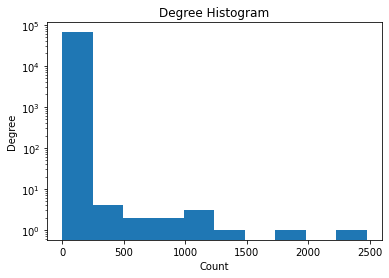

In [11]:
plt.title("Degree Histogram")
plt.xlabel("Count")
plt.ylabel("Degree")

degrees = [G.degree(n) for n in G.nodes()]

plt.hist(degrees,log='true')
plt.show()

##### Scatter Plot
A scatter plot can give us a better indication as to how exactly the degree distribution is spread

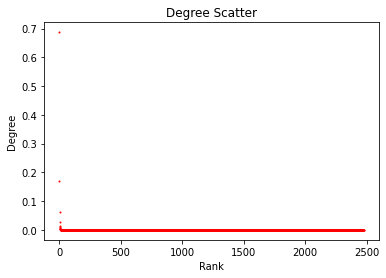

In [27]:
plt.title("Degree Scatter")
plt.xlabel("Rank")
plt.ylabel("Degree")

#creates a distribution of degrees
degree=nx.degree_histogram(G)
degree.sort(reverse=True)

#Generate normalised values for y according to degree
y=[z/float(sum(degree))for z in degree]

#Generate X axis sequence, from 1 to maximum degree
x=range(len(degree))
plt.scatter(x,y,s=1,color=(1,0,0))

plt.show()

#### Average Path Length
Average path length is the sum of path lengths between all pairs of nodes normalized by n*(n-1) where n is the number of nodes in G.
Since this has to be worked out on a connected graph, the averagePathLength has to be calculated on the largest connected subgraph.

In [13]:
averagePathLength = nx.average_shortest_path_length(SG)

#### Global Clustering Coeefficient
The Global Clustering Coefficient is the number of closed triplets (triangles) over the total number of triplets (both open and closed). A triplet consists of three nodes connected with 2 edges c. A triangle includes three closed overlapping triplets, one centered on each of the nodes. 

In [32]:
#The average clustering coefficient for the graph G
clusteringCoeefficient = nx.average_clustering(G)

In [33]:
#Compute graph transitivity, the fraction of all possible triangles present in G.
transitivity = nx.transitivity(G)

### Printing Statistics

In [42]:
print("Number Of Nodes: ", numberOfNodes, "\n")
print("Number Of Edges: ", numberOfEdges, "\n")
print("Average Shortest Path Length (for largest connected graph): ", averagePathLength, "\n")
print("Clustering Coefficient: ", clusteringCoeefficient, "\n")
print("Transitivity: ", transitivity, "\n")
#uncomment to show (commented since the give a large output)
#print("In Degree: ", inDegree, "\n")
#print("Out Degree: ", outDegree, "\n")

Number Of Nodes:  65760 

Number Of Edges:  68839 

Average Shortest Path Length (for largest connected graph):  0.013634224566790034 

Clustering Coefficient:  0.020226636811185247 

Transitivity:  0.01666282425331309 



The graph is not totally connected, however there is a giant component which conatains the majority of the connected nodes 
# //add results based on the computed statistics

## Determining the Top 10 users

Prints the keys and corresponding values from a dictionary

In [15]:
def printDict(d):
    for key in d:
        print(key, '\t:\t', d[key])

Prints the top 'n' number of users from a dictionary

In [16]:
def printTopN(d, n):
    counter = 1
    for key in d:
        print(key, '\t:\t', d[key])
        if (counter >= n):
            break
        counter +=1

Sorts a dictionary according to the value in descending order

In [17]:
def sortDictDesc(d):
    sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
    return sorted_d

The degree centrality for a node v is the fraction of nodes it is connected to.

In [18]:
degreeCentrality = nx.degree_centrality(G)
degreeCentrality = sortDictDesc(degreeCentrality)

Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes.

In [19]:
closenessCentrality = nx.closeness_centrality(G)
closenessCentrality = sortDictDesc(closenessCentrality)

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v

In [ ]:
betweennessCentrality = nx.betweenness_centrality(G, normalized=True)
betweennessCentrality = sortDictDesc(betweennessCentrality)

In [ ]:
print("Degree Centrality\n")
printTopN(degreeCentrality, 10)
print("\n\nCloseness Centrality\n")
printTopN(closenessCentrality, 10)
print("\n\nBetweenness Centrality\n")
printTopN(betweennessCentrality, 10)

Directionality is important in this graph. This is because if user1 mentions user2, it doesnt mean that user2 mentions user1. The functions used to calulate degree, closeness and betweenness centrality all work for undirected, directed as well as multigraphs. Therefore there were no problems faced with regards to directionality.

## Visualise the Graph

Plots the whole graph with all the edges and labels. However this results in an undistinguishable graph.

Instead of plotting the whole graph, we can plot the subgraph of strongly connected components of the whole graph. This will only show us the most important components of the graph. The size of the nodes also depends on their betweeness centrality, where the larger the centrality, the larger the size of the node will be. The width of the vertices/arrows also depends on the weight of the edge, meaning the number of mentions.

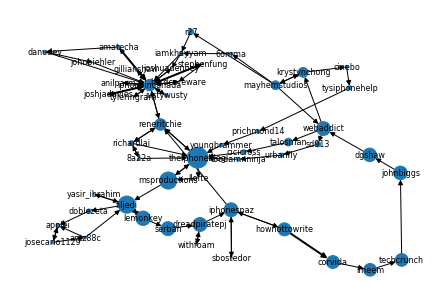

In [45]:
largest_cc = max(nx.strongly_connected_components(G), key=len)
SG = G.subgraph(largest_cc)

weights = [G[u][v]['weight'] for u,v in edges]

node_sizes = []
for n in SG.nodes():
    node_sizes.append(1000000*betweennessCentrality[n])

nx.draw_kamada_kawai(SG, node_size=node_sizes, with_labels=True, font_size=8, width=weights)
plt.show()